<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/Muyoung/decisionTree_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# Data loading and cleaning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dbcan = pd.read_csv("/content/drive/MyDrive/sds384_team_project/dbcan_result.3772genomes.matrix.divided_by_gene_counts.tsv", sep="\t")
print(dbcan.shape)
dbcan.head()

(3772, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cog = pd.read_csv("/content/drive/MyDrive/sds384_team_project/cog_ratios.csv")
print(cog.shape)
# Remove rows without gene counts
cog = cog[cog["Gene_Count___*_assembled"] > 0]
print(cog.shape)
cog.head()

(3837, 4216)
(3772, 4216)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,NPA,0.66,5886.0
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,0.24,5452.0
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,4.34,1359.0
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,NPA,0.20,6637.0
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,PA,1.93,6738.0


In [5]:
del cog["Classification"]
del cog["Gene_Count___*_assembled"]
print(cog.shape)
cog.head()

(3772, 4214)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.000000,0.0,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,0.66
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.24
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,4.34
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.000151,0.0,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,0.20
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.000297,0.0,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,1.93


In [6]:
total = dbcan.merge(cog.iloc[:, 1:], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]

del dbcan
del cog

print(total.shape)
total.head()

(3772, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


In [7]:
#total.to_csv("cleaned_data.dbcan_cog_HGT.tsv", sep="\t")

# Separating soil bacteria

In [8]:
df = total[total["Classification"] != "soil"]
print(df.shape)
df.head()

(3261, 4564)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


# Normalization and Feature selection
1. Apply standard scaler.
1. Remove features with zero variance. (same values for all bacteria)
2. Select top 1000 features using Recursive feature elimination with random forest classifier
3. Remove highly correlated features (absolute value > 0.8)


Normalization (standard scaling)

In [9]:
features = df.columns[4:]
scaler = StandardScaler().fit(df[features])
df_normalized = pd.DataFrame(scaler.transform(df[features]), columns=features)
df = pd.concat([df.iloc[:, :4], df_normalized], axis=1)
df.head()

,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.066808,-0.378513,-0.423784,-0.389091,1.002863,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.331415
1,2519103115,Acinetobacter,NPA,NPA,0.136692,-0.378513,2.474260,-0.348927,1.096538,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.313281
2,2519899735,Acinetobacter,NPA,NPA,0.121340,-0.378513,2.441586,-0.357750,1.075959,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.331415
3,2526164562,Acinetobacter,NPA,NPA,1.317699,-0.378513,-0.423784,-0.400855,0.975425,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.218343
4,2529293005,Acinetobacter,NPA,NPA,0.123815,-0.378513,2.446855,-0.356327,1.079278,-0.170719,...,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738,-0.294080


Remove features with zero variance

In [10]:
constant_filter = VarianceThreshold(threshold=0) 
constant_filter.fit(total[features])
features = constant_filter.get_feature_names_out(features)

***Split the training and test data sets considering PA and NPA bacteria.***

In [11]:
X = df[features]
y = df["Classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

Select top 1000 features using random forest classifier

In [12]:
from sklearn.feature_selection import RFE
# The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=1000, step=0.05)
#Top 1000 #Remove the worst 5% of features at each iteration.
selector = selector.fit(X_train, y_train.values.ravel())

selected_features = X.columns[selector.get_support()]

Remove highly correlated features

In [13]:
correlation_matrix = df[selected_features].corr().abs()

In [14]:
threshold = 0.8
highly_correlated = []

columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
                highly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

selected_features_2 = selected_features[columns]
highly_correlated[:10]

[('AA3', 'COG2303'),
 ('CBM48', 'COG0296'),
 ('CE11', 'COG1043'),
 ('CE11', 'COG1212'),
 ('CE4', 'COG0726'),
 ('GH1', 'COG2723'),
 ('GH103', 'COG2951'),
 ('GH109', 'COG0673'),
 ('GH13', 'COG0366'),
 ('GH13', 'COG1523')]

In [15]:
print(len(selected_features), len(selected_features_2))

1000 859


In [16]:
X = X[selected_features_2]
X_train = X_train[selected_features_2]
X_test = X_test[selected_features_2]

# Traning and testing the decision tree model

In [17]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf1 = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred1))

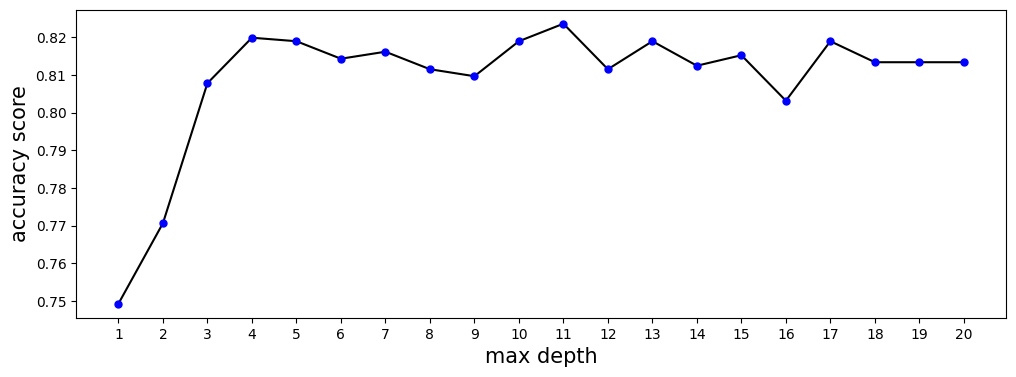

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [19]:
for i, value in enumerate(accuracies):
  print(i+1, value)

1 0.7493036211699164
2 0.7706592386258124
3 0.807799442896936
4 0.819870009285051
5 0.8189415041782729
6 0.8142989786443825
7 0.8161559888579387
8 0.8115134633240483
9 0.8096564531104921
10 0.8189415041782729
11 0.8235840297121634
12 0.8115134633240483
13 0.8189415041782729
14 0.8124419684308264
15 0.8152274837511606
16 0.8031569173630455
17 0.8189415041782729
18 0.8133704735376045
19 0.8133704735376045
20 0.8133704735376045


In [20]:
clf1 = tree.DecisionTreeClassifier(max_depth=11, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))

0.8235840297121634


In [21]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature importances are provided by the fitted attribute feature_importances_ and
# they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
importances = clf1.feature_importances_
forest_importances = pd.Series(importances, index=clf1.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG0667    0.313807
COG3131    0.086881
COG0467    0.056978
COG3766    0.032614
COG2608    0.029342
COG0404    0.029186
COG0798    0.023490
COG1292    0.021644
CE12       0.017172
GT2        0.013349
COG1674    0.010851
COG0147    0.010279
COG0604    0.010237
COG1721    0.010117
COG3311    0.009937
COG1294    0.009367
GH20       0.009019
COG0829    0.008834
COG0598    0.008821
COG0785    0.008795
dtype: float64

# Traning and testing the random forest model

In [22]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf2 = RandomForestClassifier(max_depth=depth, random_state=42)
  clf2.fit(X_train, y_train.values.ravel())
  y_pred2 = clf2.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred2))

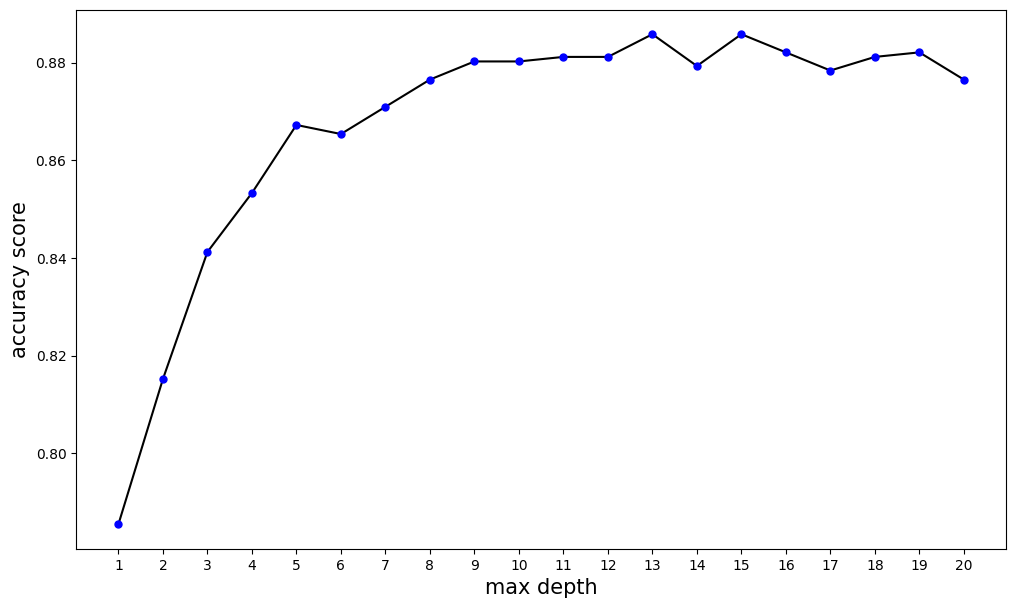

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [24]:
for i, value in enumerate(accuracies):
  print(i+1, value)

1 0.7855153203342619
2 0.8152274837511606
3 0.841225626740947
4 0.8532961931290622
5 0.8672237697307336
6 0.8653667595171773
7 0.8709377901578459
8 0.8765088207985144
9 0.8802228412256268
10 0.8802228412256268
11 0.8811513463324049
12 0.8811513463324049
13 0.8857938718662952
14 0.8792943361188487
15 0.8857938718662952
16 0.8820798514391829
17 0.8783658310120706
18 0.8811513463324049
19 0.8820798514391829
20 0.8765088207985144


In [25]:
clf2 = RandomForestClassifier(max_depth=13, random_state=42)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.8857938718662952


In [26]:
importances = clf2.feature_importances_
forest_importances = pd.Series(importances, index=clf2.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG0467    0.019155
COG0667    0.017622
COG3569    0.017475
COG3492    0.017001
COG1349    0.016331
COG1129    0.014735
COG0569    0.010825
COG3386    0.009718
COG4191    0.009256
COG1291    0.009053
COG4213    0.008269
COG1319    0.008029
COG1801    0.007569
COG0524    0.007235
COG3734    0.006895
COG2085    0.006795
COG0232    0.006738
COG0474    0.006555
COG2942    0.006190
COG1344    0.006166
dtype: float64

# Precision Recall Curves

In [27]:
clf1.predict_proba(X_test)[:3]

array([[0.        , 1.        ],
       [0.01006711, 0.98993289],
       [0.01006711, 0.98993289]])

In [28]:
clf1.predict(X_test)[:3]

array(['PA', 'PA', 'PA'], dtype=object)

In [29]:
clf2.predict_proba(X_test)[:3]

array([[0.71842905, 0.28157095],
       [0.15420451, 0.84579549],
       [0.05430321, 0.94569679]])

In [30]:
clf2.predict(X_test)[:3]

array(['NPA', 'PA', 'PA'], dtype=object)

In [31]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, clf1.predict_proba(X_test)[:,0], pos_label="NPA")
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, clf2.predict_proba(X_test)[:,0], pos_label="NPA")

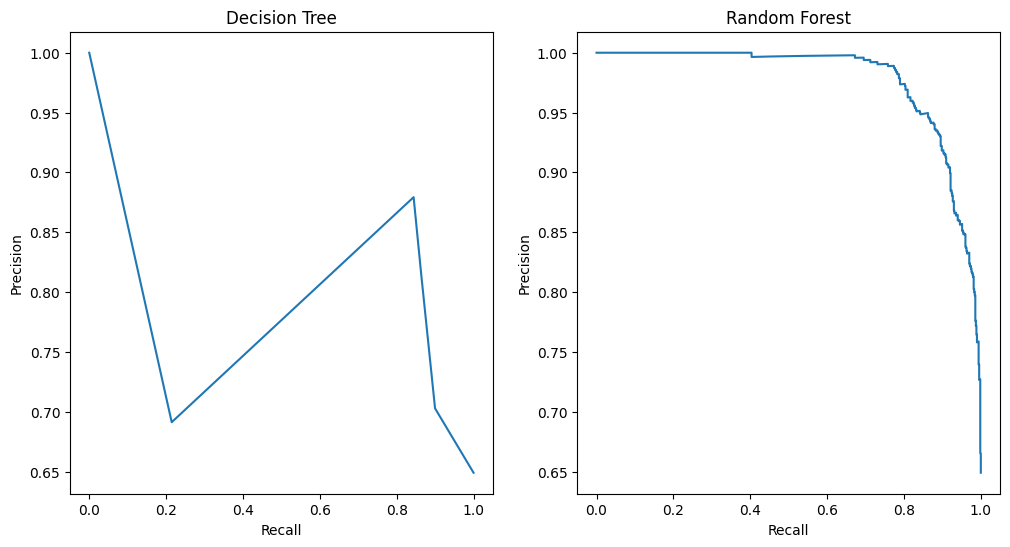

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].plot(recall_1, precision_1)
ax[0].set_title("Decision Tree")
ax[1].plot(recall_2, precision_2)
ax[1].set_title("Random Forest")
ax[0].set_xlabel("Recall")
ax[0].set_ylabel("Precision")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")

plt.show()

# Prediction on the soil bacteria using trained models

In [33]:
df = total[total["Classification"] == "soil"]
df = df.reset_index(drop=True)
df.head()

,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2534682017,Acinetobacter,soil,soil,0.000267,0.000000,0.000000,0.000267,0.000267,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32
1,2534682020,Acinetobacter,soil,soil,0.000257,0.000000,0.000000,0.000257,0.000257,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.05
2,2576861110,Acinetobacter,soil,soil,0.000497,0.000000,0.000248,0.000248,0.000248,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.60
3,648028004,Acinetobacter,soil,soil,0.000252,0.000000,0.000000,0.000505,0.000252,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.50
4,2502894011,Actinobacteria,soil,soil,0.000128,0.000641,0.000000,0.000256,0.000128,0.000128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50


In [34]:
features = df.columns[4:]
scaler = StandardScaler().fit(df[features])
df_normalized = pd.DataFrame(scaler.transform(df[features]), columns=features)
df = pd.concat([df.iloc[:, :4], df_normalized], axis=1)
df.head()

,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Horizontally_Transferred_%
0,2534682017,Acinetobacter,soil,soil,0.462913,-0.625204,-0.319784,-0.077318,0.686879,-0.189468,...,-0.351246,-0.143073,-0.606353,-0.257713,-0.119156,-0.209364,-0.692661,-0.429728,-0.13197,-0.425102
1,2534682020,Acinetobacter,soil,soil,0.410020,-0.625204,-0.319784,-0.103413,0.620996,-0.189468,...,-0.351246,-0.143073,-0.606353,-0.257713,-0.119156,-0.209364,-0.692661,-0.429728,-0.13197,-0.355899
2,2576861110,Acinetobacter,soil,soil,1.727213,-0.625204,3.009467,-0.127694,0.559694,-0.189468,...,-0.351246,-0.143073,-0.606353,-0.257713,-0.119156,-0.209364,-0.692661,-0.429728,-0.13197,-0.114161
3,648028004,Acinetobacter,soil,soil,0.382872,-0.625204,-0.319784,0.568221,0.587180,-0.189468,...,-0.351246,-0.143073,-0.606353,-0.257713,-0.119156,-0.209364,-0.692661,-0.429728,-0.13197,-0.218440
4,2502894011,Actinobacteria,soil,soil,-0.300240,2.223318,-0.319784,-0.105831,-0.263711,2.117036,...,-0.351246,-0.143073,-0.606353,-0.257713,-0.119156,-0.209364,-0.692661,-0.429728,-0.13197,-0.408038


In [35]:
X = df[selected_features_2]
df["prediction1"] = clf1.predict(X)
df["prediction2"] = clf2.predict(X)
df[["taxonID", "Order", "Classification", "prediction1", "prediction2"]].head()

,taxonID,Order,Classification,prediction1,prediction2
0,2534682017,Acinetobacter,soil,NPA,NPA
1,2534682020,Acinetobacter,soil,NPA,NPA
2,2576861110,Acinetobacter,soil,NPA,NPA
3,648028004,Acinetobacter,soil,NPA,NPA
4,2502894011,Actinobacteria,soil,PA,NPA


In [36]:
num_matches = sum(df["prediction1"] == df["prediction2"])
print(f"{num_matches} matching predictions")

377 matching predictions


#Visualization of the tree

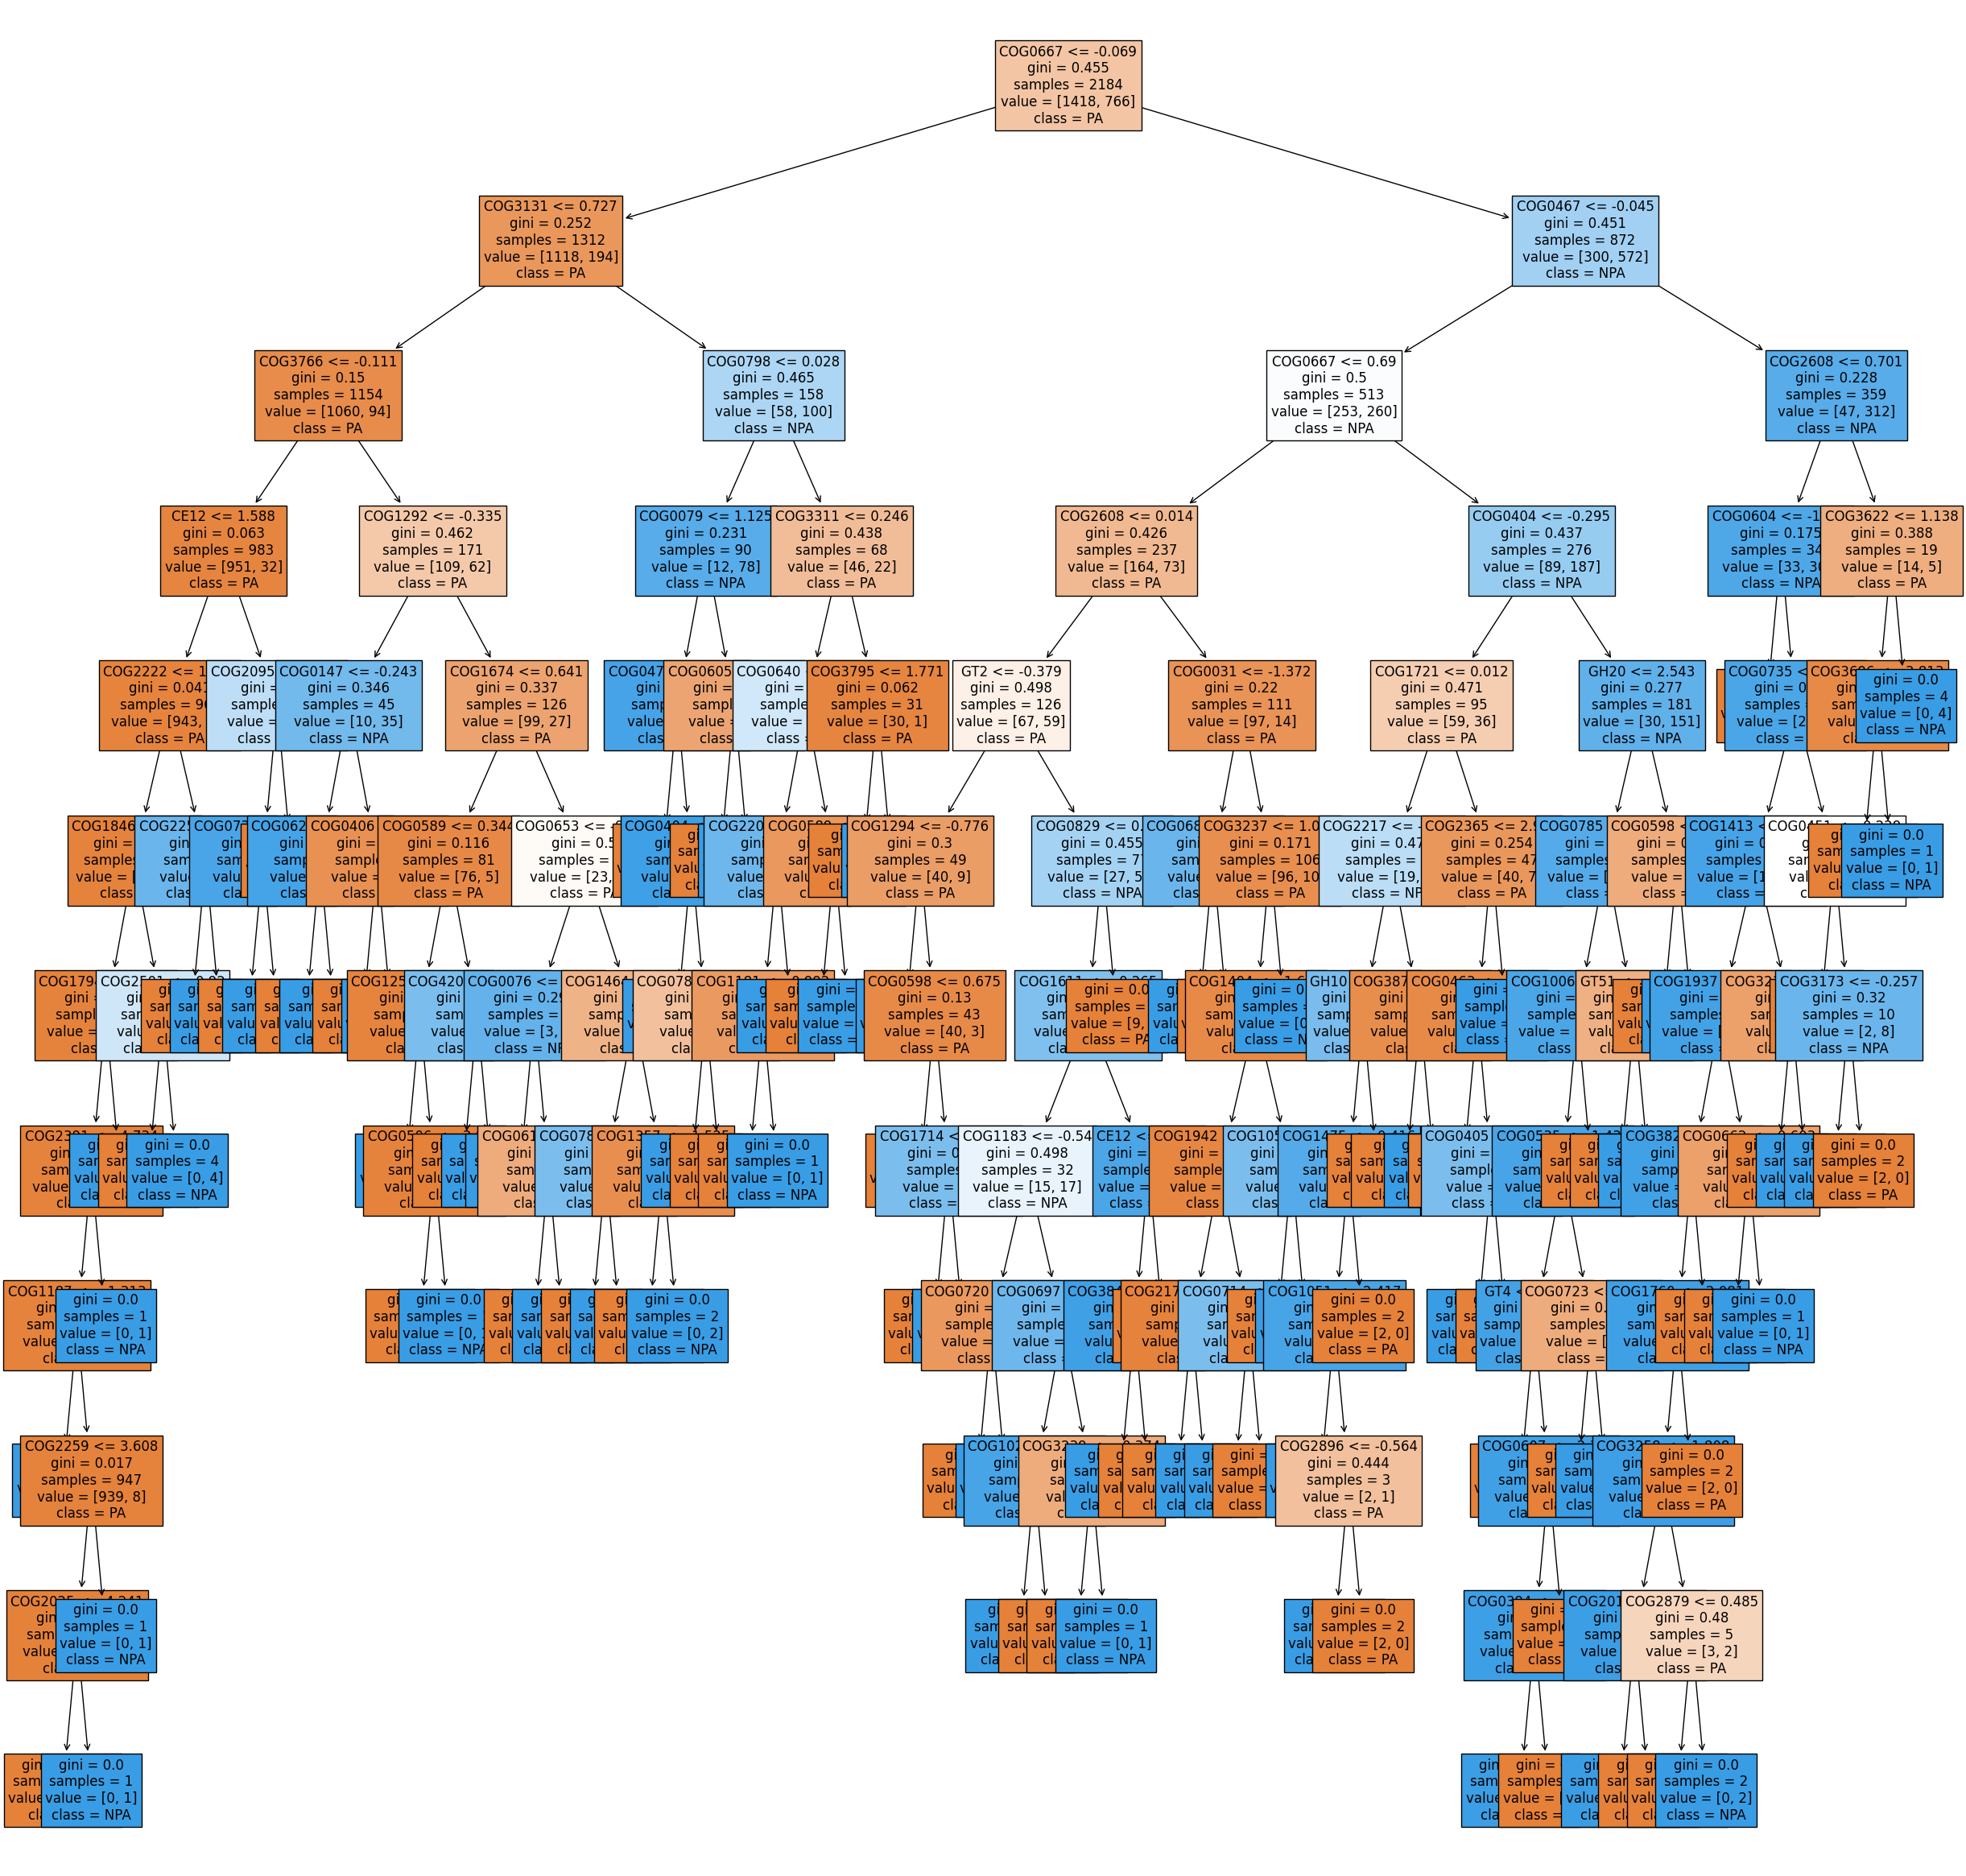

In [37]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf1, fontsize=12, feature_names=selected_features_2, class_names=["PA", "NPA"], filled=True)
plt.show()